【問題1】1次関数
　　xが-50から50の範囲で次の式を考えます

In [1]:
import numpy as np
x_ndarray = np.arange(-50, 50.1, 0.1) # xのndarrayを作る
xr_ndarray = x_ndarray.reshape(1001,1 )
print(xr_ndarray)

[[-50. ]
 [-49.9]
 [-49.8]
 ...
 [ 49.8]
 [ 49.9]
 [ 50. ]]


In [2]:
y_ndarray = x_ndarray/2 + 1 # xのndarrayを２で割って１足す
yr_ndarray = y_ndarray.reshape(1001,1 )
print(yr_ndarray)

[[-24.  ]
 [-23.95]
 [-23.9 ]
 ...
 [ 25.9 ]
 [ 25.95]
 [ 26.  ]]


【問題2】配列の結合

In [3]:
hairetsu_ndarray = np.concatenate((xr_ndarray, yr_ndarray),axis=1)
print(hairetsu_ndarray)

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


【問題3】勾配を求める

In [4]:
d_xr_ndarray = xr_ndarray[1:] - xr_ndarray[:-1] #Xの変化量
#print(d_xr_ndarray)
d_yr_ndarray = yr_ndarray[1:] - yr_ndarray[:-1] #Xの変化量
#print(d_yr_ndarray)

koubai_ndarray = d_yr_ndarray/d_xr_ndarray
#print(koubai_ndarray)
koubai_ndarray.shape

(1000, 1)

【問題4】グラフを描く

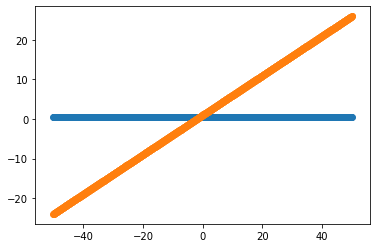

In [6]:
import numpy as np
#from numpy.random import *
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
import seaborn as sns
#import random

plt.scatter(xr_ndarray[:-1],koubai_ndarray)
plt.scatter(xr_ndarray,yr_ndarray)
plt.show()

【問題5】Pythonの関数化

In [32]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    x_ndarray = np.arange(x_range[0], x_range[1], x_range[2]) # xのndarrayを作る
    xr_ndarray = x_ndarray.reshape(x_ndarray.shape[0],1 )
    yr_ndarray = function(xr_ndarray)
    array_xy = np.concatenate((xr_ndarray, yr_ndarray),axis=1)
    array_xy_delta = array_xy[1:] - array_xy[:-1] #Xの変化量
    gradient = array_xy_delta[:, 1:2]/array_xy_delta[:, 0:1]
    return array_xy, gradient

def function0(array_x): # = np.arange(-50, 50.1, 0.1)):
    array_y = array_x**2 # xのndarrayを2情する
    return array_y

def function1(array_x): # = np.arange(-50, 50.1, 0.1)):
    array_y = 2*array_x**2 + 2**array_x # xのndarrayを2情する
    return array_y

def function2(array_x): # = np.arange(-50, 50.1, 0.1)):
    array_y = np.sin(array_x**(1/2)) # xのndarrayを2情する
    return array_y
  
array_xy0, gradient0 = compute_gradient(function0)
array_xy1, gradient1 = compute_gradient(function1)
array_xy2, gradient2 = compute_gradient(function2,x_range=(0, 50.1, 0.1))

【問題6】最小値を求める

$$ y = x^{2} \quad (-50\leq x \leq 50)\\ $$

In [53]:
print("最小値" + str(array_xy0[:, 1:2].min()))
print("最小値のインデックス" + str(array_xy0[:, 1:2].argmin()))
print("最小値前後の勾配" + str(gradient0[array_xy0[:, 1:2].argmin()])\
                       + str(gradient0[array_xy0[:, 1:2].argmin() - 1]))

最小値5.048709793414476e-25
最小値のインデックス500
最小値前後の勾配[0.1][-0.1]


$$ y = 2x^{2}+2^{x} \quad (-50\leq x \leq 50)\\ $$

In [54]:
print("最小値" + str(array_xy1[:, 1:2].min()))
print("最小値のインデックス" + str(array_xy1[:, 1:2].argmin()))
print("最小値前後の勾配" + str(gradient1[array_xy1[:, 1:2].argmin()])\
                       + str(gradient1[array_xy1[:, 1:2].argmin() - 1]))

最小値0.9505505632959851
最小値のインデックス498
最小値前後の勾配[0.02482428][-0.41701833]


$$ y = sin(x^{\frac{1}{2}}) \quad (0\leq x \leq 50) $$

In [55]:
print("最小値" + str(array_xy2[:, 1:2].min()))
print("最小値のインデックス" + str(array_xy2[:, 1:2].argmin()))
print("最小値前後の勾配" + str(gradient2[array_xy2[:, 1:2].argmin()])\
                       + str(gradient2[array_xy2[:, 1:2].argmin() - 1]))

最小値-0.9999997540298113
最小値のインデックス222
最小値前後の勾配[0.00048745][-0.00063884]
